In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the CSV file from your device
# Make sure the file name and path are correct!

data = pd.read_csv('BostonHousing.csv')

# Show first few rows to check
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Separate features and target
X = data.drop('medv', axis=1).values   # Drop 'medv' column (target)
y = data['medv'].values                # Target values


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize (normalize) the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer (no activation for regression)
])


C:\Users\ANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 574.4999 - mae: 22.0833 - val_loss: 518.8672 - val_mae: 21.1839
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 514.7433 - mae: 20.7557 - val_loss: 454.6660 - val_mae: 19.6698
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 462.3205 - mae: 19.3084 - val_loss: 370.4772 - val_mae: 17.4844
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 381.7005 - mae: 17.0314 - val_loss: 266.6277 - val_mae: 14.4034
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 261.3278 - mae: 13.5425 - val_loss: 159.7188 - val_mae: 10.4350
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 152.6075 - mae: 9.9110 - val_loss: 84.4375 - val_mae: 6.6914
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 89.1787 - mae: 7.3071 - val_loss: 54.8952 - val_mae: 5.0000
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.5686 - mae: 6.3546 - val_loss: 43.4592 - val_mae: 4.4126
Epoch 9/100
12/12 ━

In [10]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.4952 - mae: 2.1043
Test MAE: 2.28


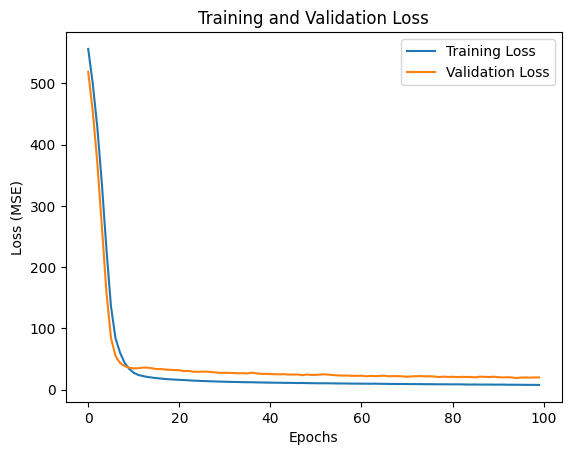

In [11]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
